<h1 style="text-align:center; color:#10002b; font-weight:bold; font-size:38px;">Introduction to Sklearn</h1>

<h1 style="text-align:left; color:#5a189a; font-weight:bold; font-size:20px;">First up, we'll go with the regression data in the preprocessing phase.
Then, we'll jump into the modeling with both of them.</h1>


### [Regression](https://github.com/Eyadwaelll/Sklearn_Session/blob/main/USA_cars_datasets.csv)    [Classification](https://github.com/Eyadwaelll/Sklearn_Session/blob/main/diabetes.csv)

<h1 style="text-align:left; color:#3c096c; font-weight:bold; font-size:28px;">Import Libraries</h1>

In [1]:
# Cleaning and Viualization Libraries
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
import re

In [2]:
# ml tools
from sklearn.preprocessing import (StandardScaler,
                                   MinMaxScaler,
                                   OrdinalEncoder,
                                   OneHotEncoder,
                                   RobustScaler,
                                   LabelEncoder,
                                   power_transform,
                                   FunctionTransformer)
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import ( cross_val_predict,
                                     cross_val_score,
                                     train_test_split,
                                     GridSearchCV,
                                     StratifiedKFold,
                                    RandomizedSearchCV)

from sklearn.pipeline import Pipeline , make_pipeline
from scipy.stats import randint
from scipy import stats
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer

In [3]:
#Classification models
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.ensemble import (RandomForestClassifier,
                              GradientBoostingClassifier,
                              BaggingClassifier)
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.ensemble import BalancedBaggingClassifier, BalancedRandomForestClassifier
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

#Regression models
from sklearn.ensemble import (RandomForestRegressor,
                                ExtraTreesRegressor,
                                BaggingRegressor,
                                GradientBoostingRegressor,
                                HistGradientBoostingRegressor)
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

In [4]:
# metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import (accuracy_score,
                             f1_score,
                             roc_auc_score,
                             roc_curve,
                             log_loss,
                             classification_report,
                             confusion_matrix)

from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
#pipeline visual
from sklearn import set_config
set_config(display='diagram')

In [5]:
# Remove warnings
import warnings
warnings.simplefilter("ignore")

<h1 style="text-align:left; color:#3c096c; font-weight:bold; font-size:28px;">Explore the data</h1>

> ***We will import both but will work on the regression one in this phase***

<h1 style="text-align:left; color:#7b2cbf; font-weight:bold; font-size:20px;">Our data</h1>

In [6]:
df_reg = pd.read_csv("regression.csv")
df_class = pd.read_csv("classification.csv")

display(df_reg.head(),df_reg.tail())
display(df_class.head(),df_class.tail())

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
2494,2494,7800,nissan,versa,2019,clean vehicle,23609.0,red,3n1cn7ap9kl880319,167722715,california,usa,1 days left
2495,2495,9200,nissan,versa,2018,clean vehicle,34553.0,silver,3n1cn7ap5jl884088,167762225,florida,usa,21 hours left
2496,2496,9200,nissan,versa,2018,clean vehicle,31594.0,silver,3n1cn7ap9jl884191,167762226,florida,usa,21 hours left
2497,2497,9200,nissan,versa,2018,clean vehicle,32557.0,black,3n1cn7ap3jl883263,167762227,florida,usa,2 days left
2498,2498,9200,nissan,versa,2018,clean vehicle,31371.0,silver,3n1cn7ap4jl884311,167762228,florida,usa,21 hours left


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


<h1 style="text-align:left; color:#7b2cbf; font-weight:bold; font-size:20px;">Some info about it</h1>

In [7]:
df_reg.shape

(2499, 13)

In [8]:
df_reg.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    2499 non-null   int64  
 1   price         2499 non-null   int64  
 2   brand         2499 non-null   object 
 3   model         2499 non-null   object 
 4   year          2499 non-null   int64  
 5   title_status  2499 non-null   object 
 6   mileage       2499 non-null   float64
 7   color         2499 non-null   object 
 8   vin           2499 non-null   object 
 9   lot           2499 non-null   int64  
 10  state         2499 non-null   object 
 11  country       2499 non-null   object 
 12  condition     2499 non-null   object 
dtypes: float64(1), int64(4), object(8)
memory usage: 253.9+ KB


* ***<span style='color:#3c096c;'>It looks like we do not have any missing values</span>***

    * ***<span style='color:#7b2cbf;'>We will fix some mistyped columns</span>***
    * ***<span style='color:#7b2cbf;'>We will drop the Unnamed: 0</span>***

> ***lot: number is combined with a serial number to form the Vehicle Identification Number.***

> ***Condition: is the time since the car been sold***

In [9]:
df_reg = df_reg.drop('Unnamed: 0',axis = 1)

In [10]:
df_reg.duplicated().sum()

0

* ***<span style='color:#7b2cbf;'>We do not have any duplicates</span>***

In [11]:
num_unique = df_reg.nunique().sort_values(ascending=False)
pct_unique = (df_reg.nunique().sort_values(ascending=False) / len(df_reg) * 100).round(3)
pct_unique = pct_unique.astype(str) + '%'

unique = pd.DataFrame({
    'Unique Count': num_unique,
    'Percentage Unique': pct_unique
})
unique

,Unique Count,Percentage Unique
vin,2495,99.84%
lot,2495,99.84%
mileage,2439,97.599%
price,790,31.613%
model,127,5.082%
color,49,1.961%
condition,47,1.881%
state,44,1.761%
year,30,1.2%
brand,28,1.12%


* ***<span style='color:#7b2cbf;'>We might drop the vin & lot</span>***
* ***<span style='color:#7b2cbf;'>We might turn the mileage into a discrete column</span>***
> ***vin: The vehicle identification number is a collection of 17 characters***

<h1 style="text-align:left; color:#7b2cbf; font-weight:bold; font-size:20px;">Summary statistics of the data</h1>

In [12]:
df_reg.describe()

,price,year,mileage,lot
count,2499.000000,2499.000000,2.499000e+03,2.499000e+03
mean,18767.671469,2016.714286,5.229869e+04,1.676914e+08
std,12116.094936,3.442656,5.970552e+04,2.038772e+05
min,0.000000,1973.000000,0.000000e+00,1.593488e+08
25%,10200.000000,2016.000000,2.146650e+04,1.676253e+08
50%,16900.000000,2018.000000,3.536500e+04,1.677451e+08
75%,25555.500000,2019.000000,6.347250e+04,1.677798e+08
max,84900.000000,2020.000000,1.017936e+06,1.678055e+08


In [13]:
df_reg.describe(include = 'object')

,brand,model,title_status,color,vin,state,country,condition
count,2499,2499,2499,2499,2499,2499,2499,2499
unique,28,127,2,49,2495,44,2,47
top,ford,door,clean vehicle,white,1gnevhkw8jj148388,pennsylvania,usa,2 days left
freq,1235,651,2336,707,2,299,2492,832


* ***<span style='color:#7b2cbf;'>The price column has some 0 values that should be fixed</span>***

<h1 style="text-align:left; color:#3c096c; font-weight:bold; font-size:28px;">Split The Data</h1>

In [14]:
x_reg = df_reg.drop('price',axis=1)
y_reg = df_reg[['price']]

X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(x_reg, y_reg, test_size=0.2, random_state=42)

> ***Split your data into train, valid, test it is more efficient***

In [15]:
train = pd.concat([X_reg_train,y_reg_train],axis=1)
train.head()

,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition,price
109,dodge,durango,2018,clean vehicle,49496.0,white,1c4rdjdg2jc329601,167755496,south carolina,usa,21 hours left,23100
2296,nissan,versa,2018,clean vehicle,54692.0,white,3n1cn7ap5jl830774,167724488,california,usa,2 days left,8000
354,ford,pickup,2009,salvage insurance,180364.0,blue,1ftyr10d19pa60391,167360535,tennessee,usa,2 days left,0
266,chevrolet,malibu,2019,clean vehicle,15780.0,white,1g1zd5st5kf112138,167767034,washington,usa,2 days left,17100
2102,ford,f-150,2018,clean vehicle,69480.0,white,1ftex1cb2jkd88410,167572896,texas,usa,1 days left,16300


In [16]:
train.shape

(1999, 12)

* ***<span style='color:#7b2cbf;'>I made this new dataset to viualize the data and decide what to put in the pipelines</span>***

<h1 style="text-align:left; color:#3c096c; font-weight:bold; font-size:28px;">Data Preprocessing</h1>

* ***<span style='color:#7b2cbf;'>At first i will drop the vin & lot columns</span>***

In [17]:
def drop_selected_columns(df, columns_to_drop):
    df.drop(columns_to_drop, axis=1, inplace=True)

In [18]:
drop_selected_columns(train, ['vin','lot'])

* **<span style='color:#7b2cbf;'>[milage, condition, price]</span>** **<span style='color:#3c096c;'>these are the columns we decided to fix before doing some visualisations</span>**

<h1 style="text-align:left; color:#3c096c; font-weight:bold; font-size:20px;">Data Label</h1>

In [19]:
(train['price'] == 0).sum()/len(train)*100

1.7008504252126064

In [20]:
def replace_column_value(df, column_name, replacement_value):
    df[column_name] = df[column_name].replace(0, replacement_value)

In [21]:
replace_column_value(train, 'price', np.nan)

* ***<span style='color:#7b2cbf;'> imputer for completing missing values with simple strategies.</span>***
    * ***<span style='color:#3c096c;'> SimpleImputer(strategy=('mean', 'median', 'most_frequent', 'constant'), fill_value= (string, none))</span>***
    * ***<span style='color:#3c096c;'> KNNImputer(n_neighbors=5)</span>***
    * ***<span style='color:#3c096c;'> IterativeImputer()</span>***

In [22]:
def impute_missing_values(df, column_to_impute, strategy):
    imputer = SimpleImputer(strategy=strategy)
    df[column_to_impute] = imputer.fit_transform(df[[column_to_impute]])

In [23]:
impute_missing_values(train, column_to_impute= 'price', strategy='median')

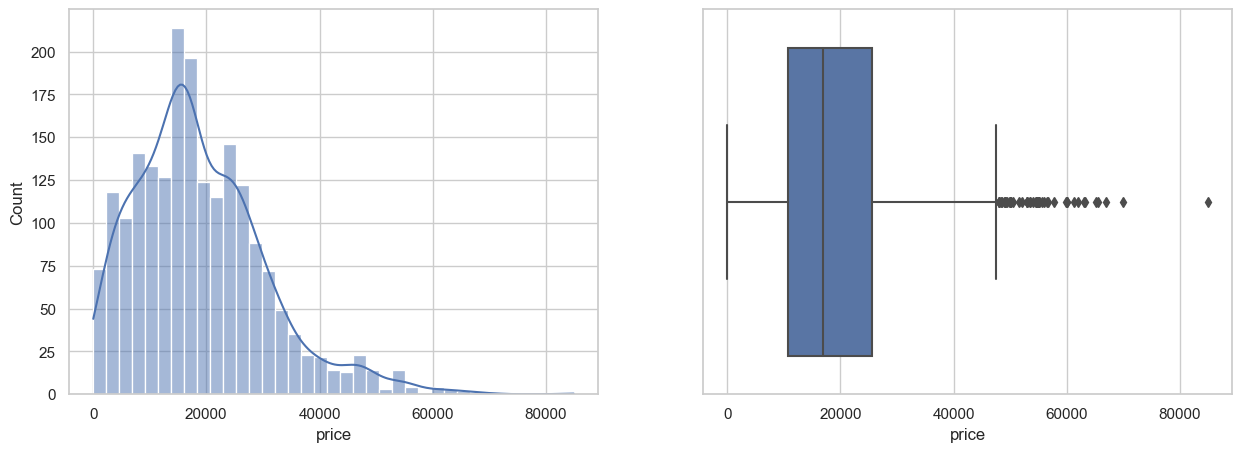

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(data=train, x="price", ax=axes[0],kde=True,palette="Blues")
sns.boxplot(data=train, x="price", ax=axes[1])

plt.show()

* ***<span style='color:#7b2cbf;'>It looks like we have many outliers</span>***

<h1 style="text-align:left; color:#3c096c; font-weight:bold; font-size:20px;">Condition Column</h1>

In [25]:
def extract_hours(value):
    if 'hours' in value:
        hours = re.findall(r'\d+', value)
        return float(hours[0])
    elif 'days' in value:
        days = re.findall(r'\d+', value)
        return float(days[0]) * 24
    elif 'minutes' in value:
        minutes = re.findall(r'\d+', value)
        return float(minutes[0]) / 60
    elif 'Listing Expired' in value:
        return 0
    else:
        return None

In [26]:
train['condition'] = train['condition'].apply(extract_hours)

<h1 style="text-align:left; color:#3c096c; font-weight:bold; font-size:20px;">Milage Column</h1>

In [27]:
def categorize_mileage(df, mileage_col):
    mileage_bins = [0, 30000, 60000, 90000, float('inf')]
    mileage_labels = ['Low', 'Moderate', 'High', 'Very High']

    df[mileage_col] = pd.cut(df[mileage_col], bins=mileage_bins, labels=mileage_labels, right=False)

    return df

In [28]:
#categorize_mileage(train, mileage_col= 'mileage')

<h1 style="text-align:left; color:#3c096c; font-weight:bold; font-size:20px;">Year Column</h1>

In [29]:
def year_trans(df, year_col):
    df['car_age'] = 2024 - df[year_col]
    return df.drop(columns=[year_col],inplace = True)

In [30]:
year_trans(train, year_col = 'year')

<h1 style="text-align:left; color:#3c096c; font-weight:bold; font-size:28px;">Data Distirbution</h1>

* ***<span style='color:#7b2cbf;'>We will split the data to make it easier</span>***

In [31]:
train_num_features = train.select_dtypes(include=['float64', 'int64']).columns.difference(['price'])

train_cat_features = train.select_dtypes(include=['object']).columns

<h1 style="text-align:left; color:#3c096c; font-weight:bold; font-size:20px;">Cat features</h1>

In [32]:
def group_infrequent_values(df, cat_features, threshold):
    for col in cat_features:
        value_counts = df[col].value_counts(normalize=True)
        infrequent_values = value_counts[value_counts < threshold].index
        df[col] = df[col].apply(lambda x: 'Other' if x in infrequent_values else x)

In [33]:
group_infrequent_values(train, train_cat_features, threshold=0.01)

In [34]:
def plot_dist_cat(df, cat_features):
    fig, axes = plt.subplots(len(cat_features), 1, figsize=(15, len(cat_features) * 5))
    
    for i, column in enumerate(cat_features):
        order = df[column].value_counts().index  
        sns.countplot(data=df, x=column, order=order, ax=axes[i], palette="Blues_d", saturation=0.8)
        axes[i].set_title(f'Count Plot for {column}')
        axes[i].tick_params(axis='x', rotation=90) 

    plt.tight_layout()
    plt.show()

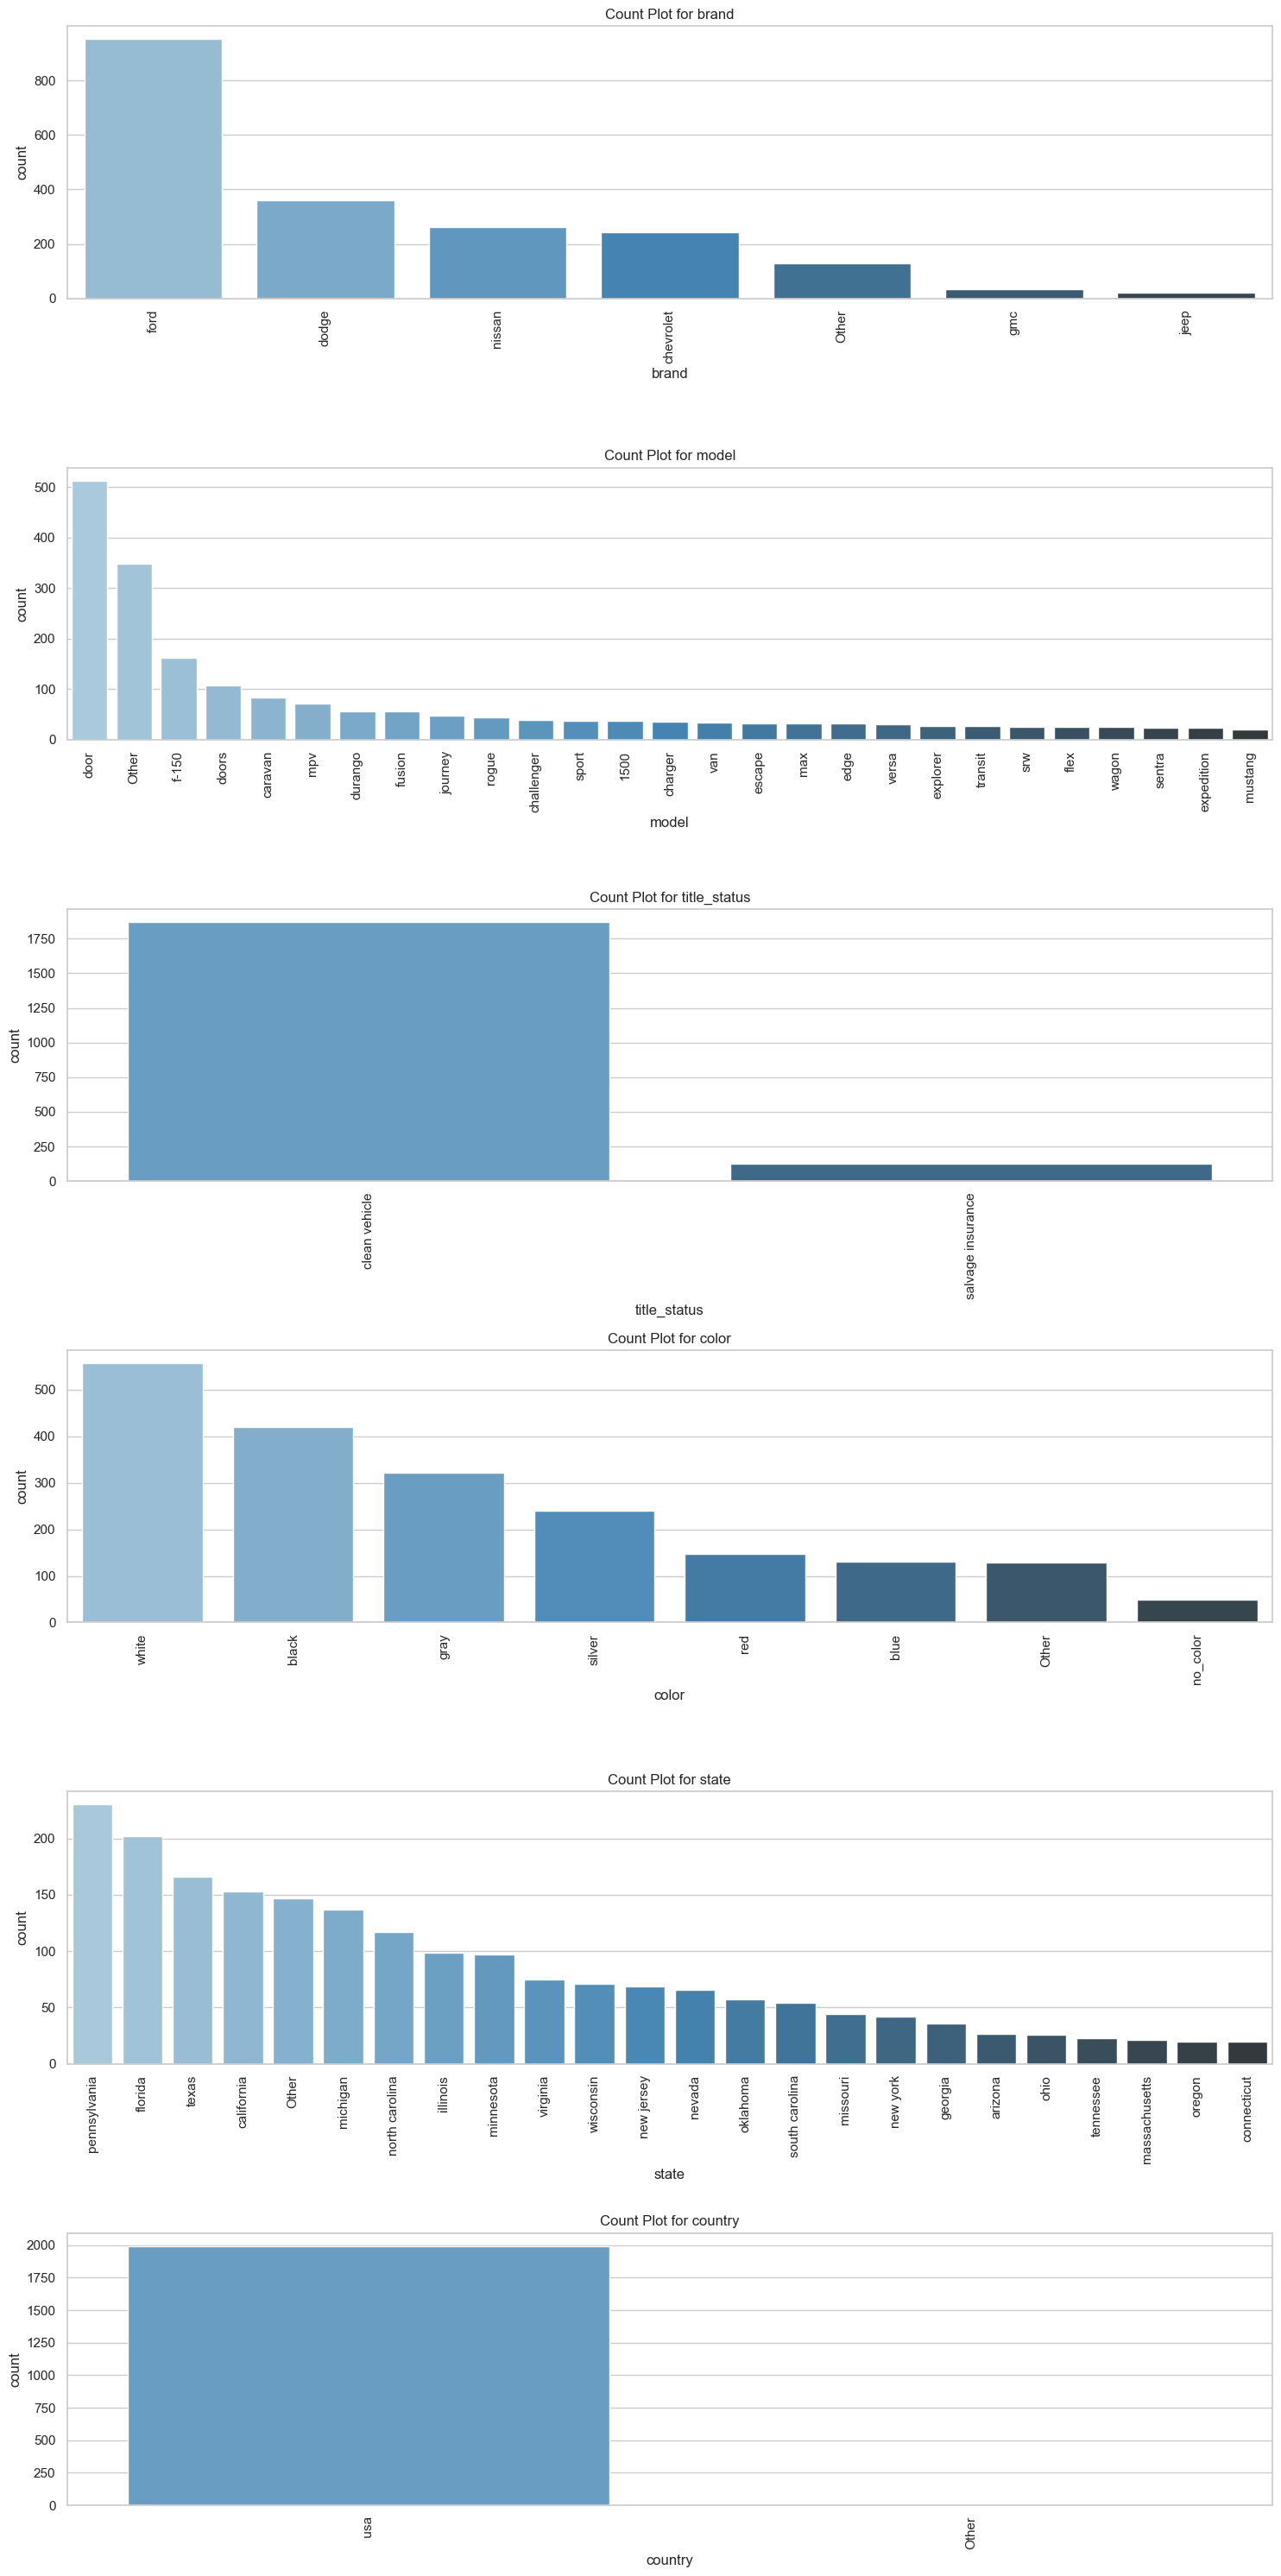

In [35]:
plot_dist_cat(train, train_cat_features)

In [36]:
def label_plot_dist_cat(df, cat_features):
    fig, axes = plt.subplots(len(cat_features), 1, figsize=(15, len(cat_features) * 5))
    
    for i, column in enumerate(cat_features):
        order = df.groupby(column)['price'].mean().sort_values(ascending=False).index
        sns.barplot(data=df, x=column, y='price', order=order, ax=axes[i], palette="Blues_d", saturation=0.8)
        axes[i].set_title(f'Bar Plot for {column} with Avg Price')
        axes[i].tick_params(axis='x', rotation=90) 

    plt.tight_layout()
    plt.show()
    

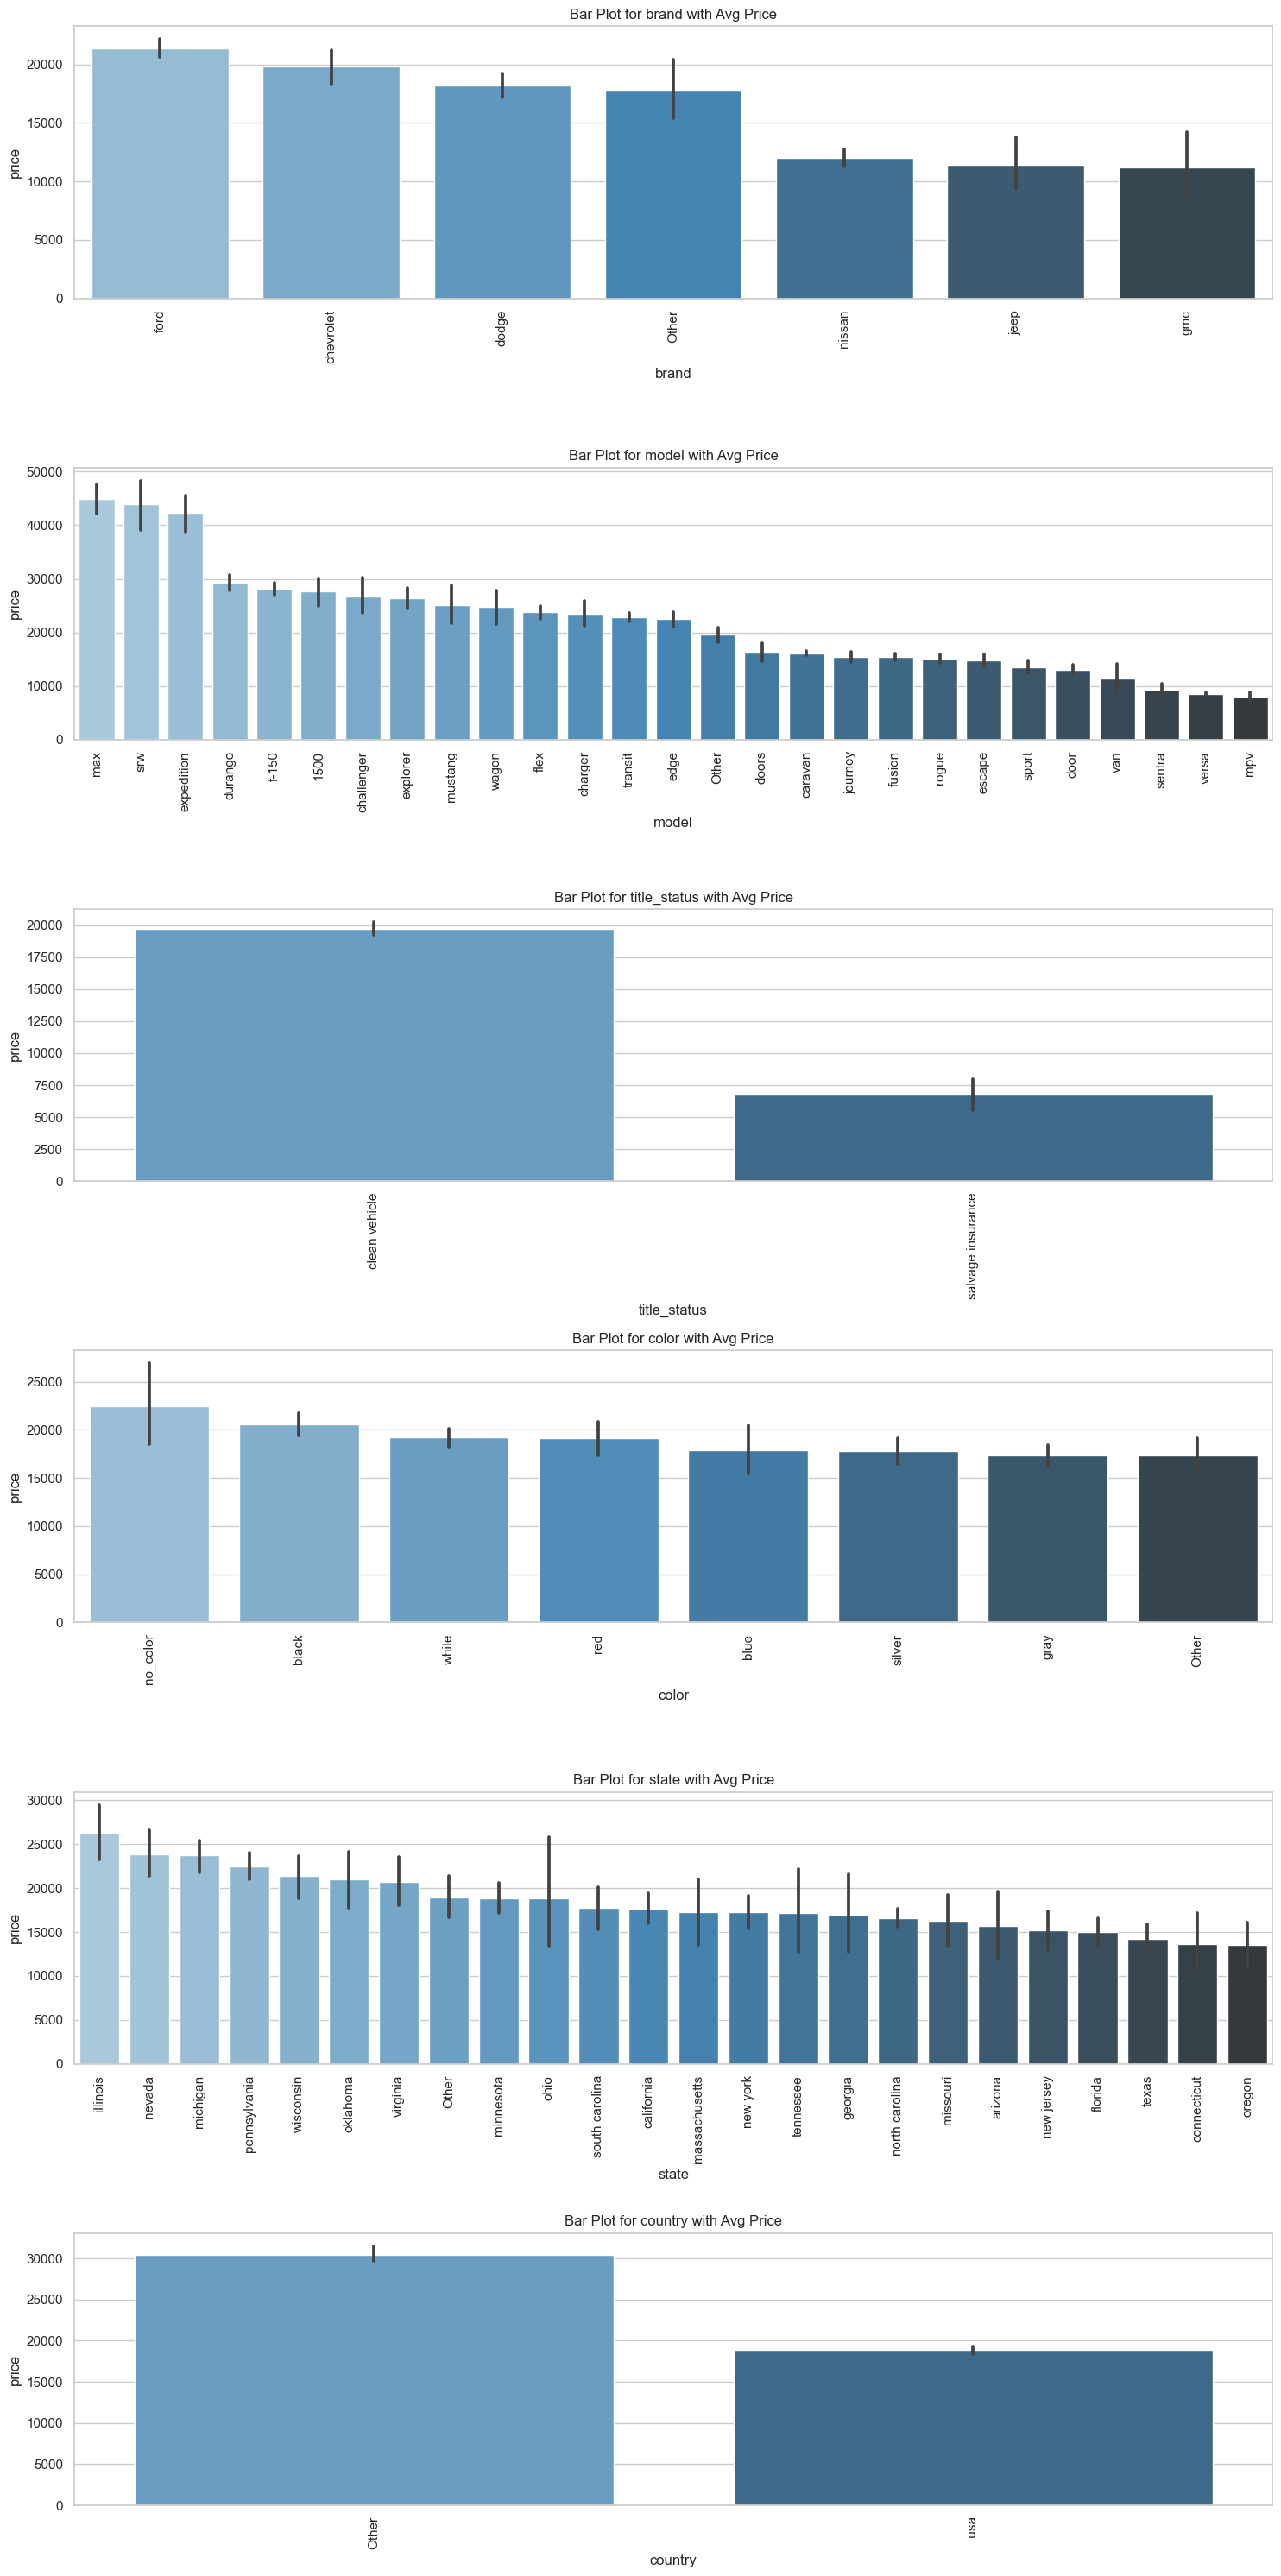

In [37]:
label_plot_dist_cat(train, train_cat_features)

<h1 style="text-align:left; color:#3c096c; font-weight:bold; font-size:20px;">Num features</h1>

In [38]:
def num_plot_dist(df, num_features):
    fig, axes = plt.subplots(len(num_features), 2, figsize=(15, len(num_features) * 5))
    
    for i, column in enumerate(num_features):
        sns.histplot(data=df, x=column, ax=axes[i, 0], kde=True, palette="Blues")
        axes[i, 0].set_title(f'Histogram with KDE for {column}')
        
        sns.boxplot(data=df, x=column, ax=axes[i, 1], palette="Blues")
        axes[i, 1].set_title(f'Box Plot for {column}')
    
    plt.tight_layout()
    plt.show()

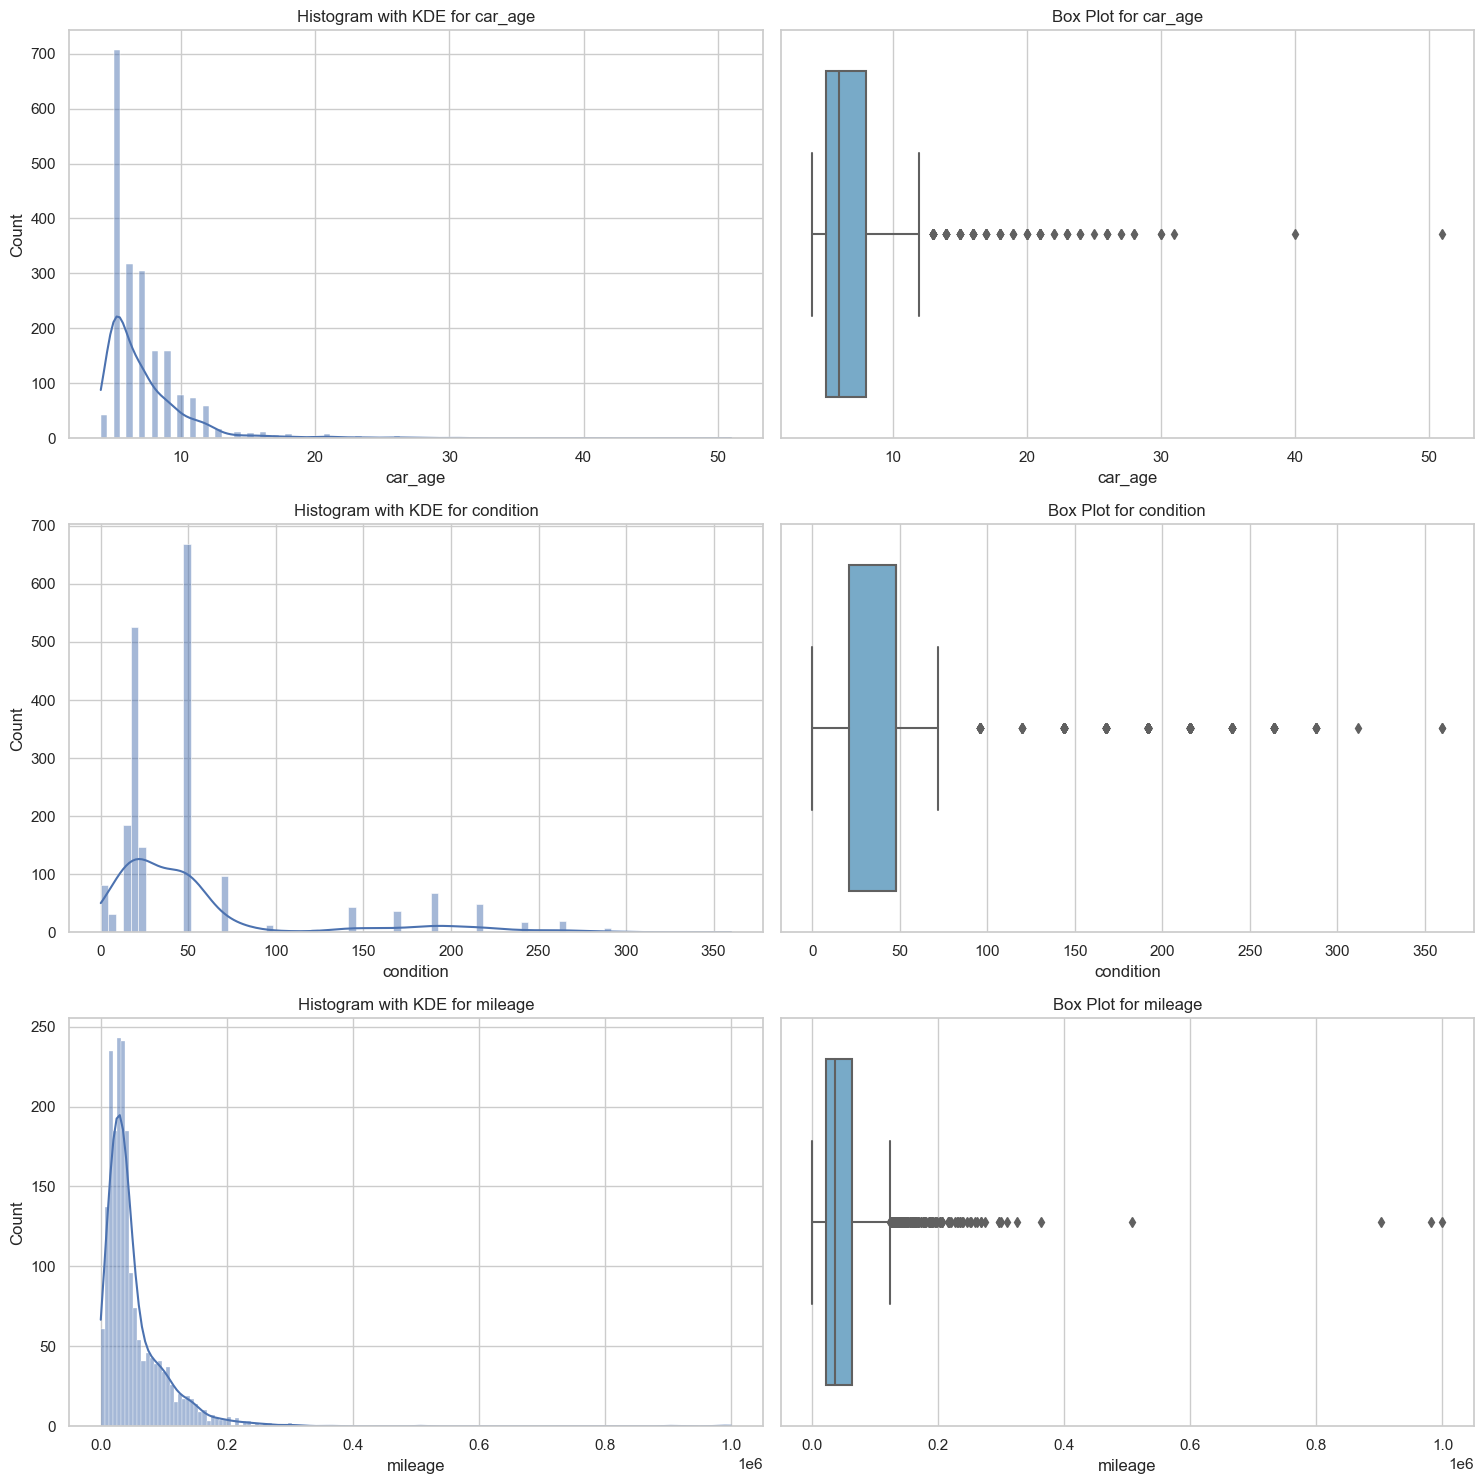

In [39]:
num_plot_dist(train,train_num_features)

In [40]:
def label_plot_dist(df, num_features):
    fig, axes = plt.subplots(len(num_features), 1, figsize=(15, len(num_features) * 5))
    
    for i, column in enumerate(num_features):
        sns.scatterplot(data=df, x=column, y='price', ax=axes[i], palette="Blues")
        axes[i].set_title(f'Scatter Plot for {column}')

    plt.tight_layout()
    plt.show()

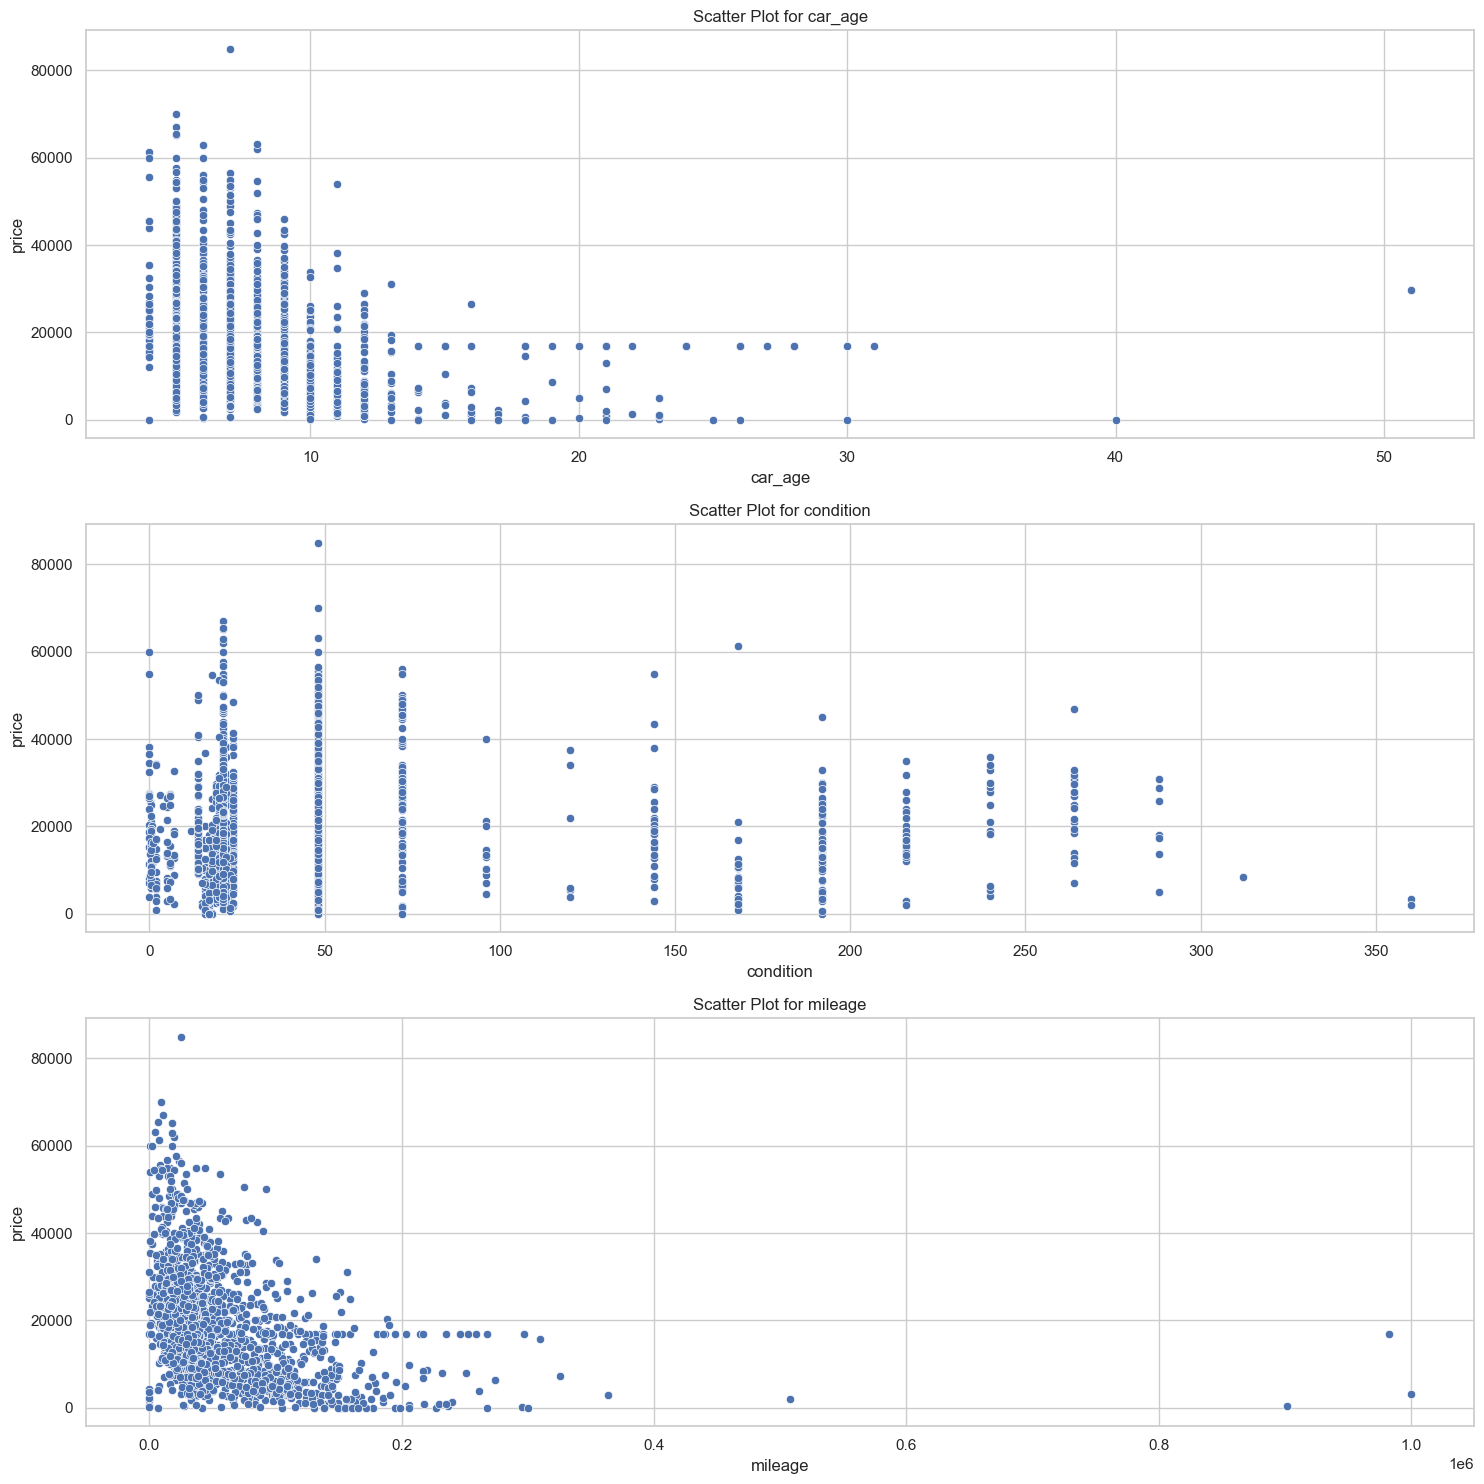

In [41]:
label_plot_dist(train,train_num_features)

<h1 style="text-align:left; color:#3c096c; font-weight:bold; font-size:20px;">Outliers</h1>

In [42]:
def outliers_pct(df):

    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = ((df < lower_bound) | (df > upper_bound)).sum()
    outliers_pct = (outliers / len(df))*100

    return outliers_pct

In [43]:
outliers_pct(train[train_num_features])

car_age       5.002501
condition    13.156578
mileage       8.004002
dtype: float64

In [44]:
def replace_outliers(df, col):
    
    Q1 = df[col].quantile(q=0.25)
    Q3 = df[col].quantile(q=0.75)
    IQR = stats.iqr(df[col])
    
    outliers = (df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))
    df.loc[outliers, col] = np.nan

In [45]:
def remove_outliers(df, col):
    
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    outliers = (df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))
    df.drop(df[outliers].index, inplace=True)

<h1 style="text-align:left; color:#3c096c; font-weight:bold; font-size:20px;">Skewness</h1>

In [46]:
train[train_num_features].skew()

car_age      3.716971
condition    2.199601
mileage      6.844343
dtype: float64

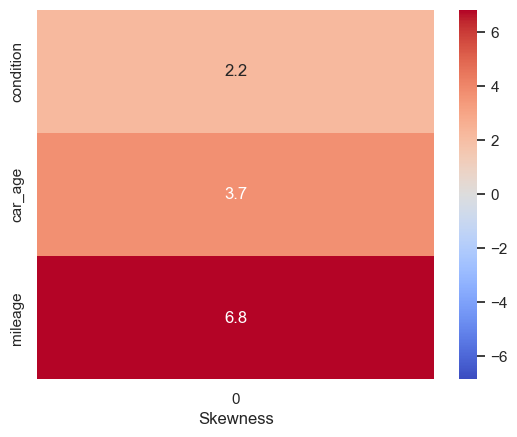

In [47]:
skewness_df = pd.DataFrame(train[train_num_features].skew().sort_values())
center_value = 0

sns.heatmap(skewness_df, cmap='coolwarm', annot=True, cbar=True,
            center=center_value, vmin=-abs(skewness_df).max().max(), vmax=abs(skewness_df).max().max())

plt.xlabel('Skewness')

plt.show()

In [48]:
transformations = [
    ('Original', lambda x: x),
    ('Log Transform', lambda x: np.log(x + 0.1)),
    ('Square Root Transform', lambda x: np.sqrt(x)),
    ('Box-Cox Transform', lambda x: stats.boxcox(x + 0.1)[0]),
    ('Yeo-Johnson Transform', lambda x: stats.yeojohnson(x)[0])
]

skewness_train = pd.DataFrame(columns=["Column", "Original Skewness", "Transformed Skewness", "Best Transformation"])

for col in train_num_features:
    original_skewness = train[col].skew()
    best_transform = None
    best_skewness = float('inf')
    
    for transform_name, transform_func in transformations:
        transformed_data = transform_func(train[col].values)
        transformed_series = pd.Series(transformed_data)
        skewness = transformed_series.skew()
        
        if abs(skewness) < abs(best_skewness):
            best_skewness = skewness
            best_transform = transform_name
    
    skewness_train = skewness_train.append({
        "Column": col,
        "Original Skewness": original_skewness,
        "Transformed Skewness": best_skewness,
        "Best Transformation": best_transform
    }, ignore_index=True)

print(skewness_train)


      Column  Original Skewness  Transformed Skewness    Best Transformation
0    car_age           3.716971              0.159624      Box-Cox Transform
1  condition           2.199601              0.060434  Yeo-Johnson Transform
2    mileage           6.844343              0.252616  Yeo-Johnson Transform


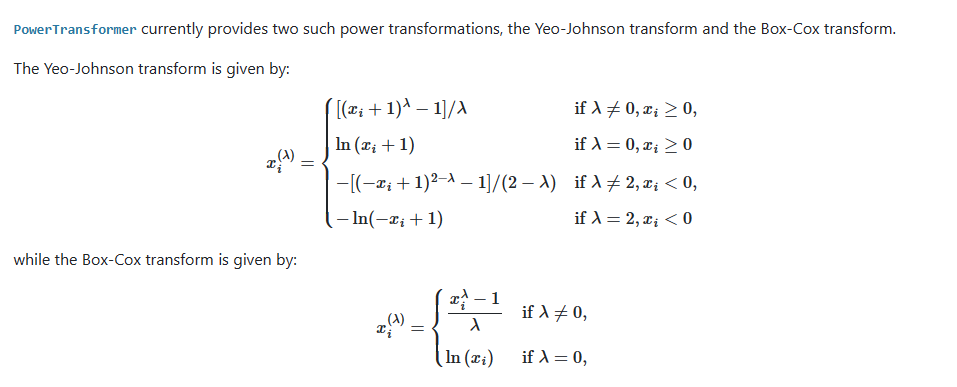

* ***<span style='color:#ff0000;'>Notes :</span>***
    
    * **The log transformation requires that the input data is not equal to zero so that the result is not equal to -inf,
        the constant (0.1) added is chosen to be very small to avoid significant distortions to the original data.**
    * **The Box-Cox transformation requires that the input data is strictly positive.**

In [49]:
def apply_Yeo_Johnson(df, num_features):
    for col in num_features:
        df[col], lambda_value = stats.yeojohnson(df[col])

In [50]:
yeo_columns = ['mileage','condition']
apply_Yeo_Johnson(train, yeo_columns)

In [51]:
def apply_box_cox(df, num_features):
    for col in num_features:
        df[col], lambda_value = stats.boxcox(df[col]+ 0.1)

In [52]:
box_columns = ['car_age']
apply_box_cox(train, box_columns)

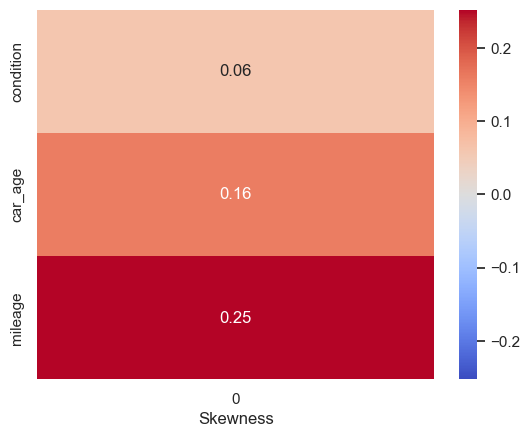

In [53]:
skewness_df = pd.DataFrame(train[train_num_features].skew().sort_values())
center_value = 0

sns.heatmap(skewness_df, cmap='coolwarm', annot=True, cbar=True,
            center=center_value, vmin=-abs(skewness_df).max().max(), vmax=abs(skewness_df).max().max())

plt.xlabel('Skewness')

plt.show()

<h1 style="text-align:left; color:#3c096c; font-weight:bold; font-size:20px;">Correlation</h1>

In [54]:
train.corr()

,mileage,condition,price,car_age
mileage,1.000000,-0.056066,-0.426492,0.659989
condition,-0.056066,1.000000,0.015362,0.008637
price,-0.426492,0.015362,1.000000,-0.390818
car_age,0.659989,0.008637,-0.390818,1.000000


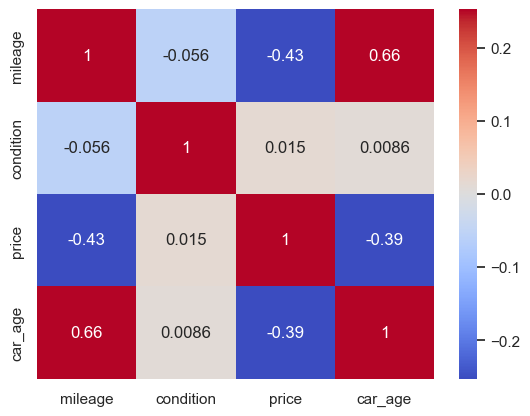

In [55]:
heatmap = sns.heatmap(train.corr(), cmap='coolwarm', annot=True,
                      cbar=True, center=center_value,
                      vmin=-abs(skewness_df).max().max(), vmax=abs(skewness_df).max().max())

<h1 style="text-align:left; color:#3c096c; font-weight:bold; font-size:28px;">Pipelines</h1>

* ***<span style='color:#3c096c;'>Let's what we did so far</span>***

    * ***<span style='color:#7b2cbf;'>We dropped some columns[vin, lot]</span>***
    * ***<span style='color:#7b2cbf;'>We replaced the zeros with median in the price column</span>***
    * ***<span style='color:#7b2cbf;'>We applied Yeo_Johnson & Sqr power transformations to fix skewness</span>***
    * ***<span style='color:#7b2cbf;'>We replaced the values under 1% with other</span>***
    * ***<span style='color:#7b2cbf;'>We may categorize the mileage column</span>***
    * ***<span style='color:#7b2cbf;'>We may deal with the outliers in the data</span>***
    * ***<span style='color:#7b2cbf;'>We converted the condition column into hours</span>***
    * ***<span style='color:#7b2cbf;'>We converted the year column into the car age</span>***

* ***<span style='color:#3c096c;'>Scaling methods</span>***

    * ***<span style='color:#7b2cbf;'>StandardScaler()</span>***
    * ***<span style='color:#7b2cbf;'>MinMaxScaler()</span>***
    * ***<span style='color:#7b2cbf;'>RobustScaler()</span>***

* ***<span style='color:#3c096c;'>Encoding methods</span>***

    * ***<span style='color:#7b2cbf;'>OrdinalEncoder()</span>***
    * ***<span style='color:#7b2cbf;'>OneHotEncoder()</span>***

<h1 style="text-align:left; color:#3c096c; font-weight:bold; font-size:20px;">Our Pipeline Functions</h1>

In [56]:
def drop_selected_columns(df, columns_to_drop):
    df_copy = df.drop(columns=columns_to_drop, axis=1)
    return df_copy

def extract_hours_transformer(df, column):
    def extract_hours(value):
        if 'hours' in value:
            hours = re.findall(r'\d+', value)
            return float(hours[0])
        elif 'days' in value:
            days = re.findall(r'\d+', value)
            return float(days[0]) * 24
        elif 'minutes' in value:
            minutes = re.findall(r'\d+', value)
            return float(minutes[0]) / 60
        elif 'Listing Expired' in value:
            return 0
        else:
            return np.nan

    df_copy = df.copy()
    df_copy[column] = df_copy[column].apply(extract_hours)
    return df_copy

def year_trans(df, year_col):
    df_copy = df.copy()
    df_copy['car_age'] = 2024 - df_copy[year_col]
    df_copy.drop(columns=[year_col], inplace=True)
    return df_copy

def group_infrequent_values(df, cat_features, threshold):
    df_copy = df.copy()
    for col in cat_features:
        value_counts = df_copy[col].value_counts(normalize=True)
        infrequent_values = value_counts[value_counts < threshold].index
        df_copy[col] = df_copy[col].apply(lambda x: 'Other' if x in infrequent_values else x)
    return df_copy

def apply_transformations(df, num_features, transformation):
    df_copy = df.copy()
    
    for col in num_features:
        if transformation == 'sqrt':
            df_copy[col] = np.sqrt(df_copy[col])
        elif transformation == 'yeo_johnson':
            df_copy[col], _ = stats.yeojohnson(df_copy[col])
        elif transformation == 'box_cox':
            df_copy[col], _ = stats.boxcox(df_copy[col] + 0.1)
        else:
            raise ValueError("Invalid transformation type. Choose from 'sqrt', 'yeo_johnson', 'box_cox'.")
    
    return df_copy
    
def scale_numerical_columns(df, columns_to_scale):
    df_copy = df.copy()
    scaler = StandardScaler()
    df_copy[columns_to_scale] = scaler.fit_transform(df_copy[columns_to_scale])
    return df_copy

def encode_categorical_columns(df, columns_to_encode):
    df_copy = df.copy()
    encoder = OrdinalEncoder()
    df_copy[columns_to_encode] = encoder.fit_transform(df_copy[columns_to_encode])
    return df_copy

In [57]:
def replace_column_value(df, column_name, replacement_value):
    df_copy = df.copy()
    df_copy[column_name] = df_copy[column_name].replace(0, replacement_value)
    return df_copy

def impute_missing_values(df, column_to_impute, strategy):
    df_copy = df.copy()
    imputer = SimpleImputer(strategy=strategy)
    df_copy[column_to_impute] = imputer.fit_transform(df_copy[[column_to_impute]])
    return df_copy

In [58]:
pipeline_1 = Pipeline([
    ('drop_columns', FunctionTransformer(drop_selected_columns, kw_args={'columns_to_drop': ['vin', 'lot', 'country']})),
    ('convert_time', FunctionTransformer(extract_hours_transformer, kw_args={'column': 'condition'})),
    ('convert_year', FunctionTransformer(year_trans, kw_args={'year_col': 'year'})),
    ('group_infrequent', FunctionTransformer(group_infrequent_values, kw_args={'cat_features': ['brand', 'model', 'state', 'color', 'title_status'], 'threshold': 0.01})),
    ('apply_yeo', FunctionTransformer(apply_transformations, kw_args={'num_features': ['mileage','condition'], 'transformation': 'yeo_johnson'})),
    ('apply_box', FunctionTransformer(apply_transformations, kw_args={'num_features': ['car_age'], 'transformation': 'box_cox'})),
    ('scaling', FunctionTransformer(scale_numerical_columns, kw_args={'columns_to_scale': ['car_age', 'condition', 'mileage']})),
    ('encoding', FunctionTransformer(encode_categorical_columns, kw_args={'columns_to_encode': ['brand', 'model', 'state', 'color', 'title_status']})),
])

In [59]:
label_pipeline = Pipeline([
    ('replace_price', FunctionTransformer(replace_column_value, kw_args={'column_name': 'price', 'replacement_value': np.nan})),
    ('impute_missing', FunctionTransformer(impute_missing_values, kw_args={'column_to_impute': 'price', 'strategy': 'median'}))
])

In [60]:
X_reg_train = pipeline_1.fit_transform(X_reg_train)
X_reg_test = pipeline_1.transform(X_reg_test)

In [61]:
y_reg_train = label_pipeline.fit_transform(y_reg_train)
y_reg_test = label_pipeline.transform(y_reg_test)

In [62]:
print("X_reg_train shape:", X_reg_train.shape)
print("y_reg_train shape:", y_reg_train.shape)
print("X_reg_test shape:", X_reg_test.shape)
print("y_reg_test shape:", y_reg_test.shape)

X_reg_train shape: (1999, 8)
y_reg_train shape: (1999, 1)
X_reg_test shape: (500, 8)
y_reg_test shape: (500, 1)


<h1 style="text-align:left; color:#3c096c; font-weight:bold; font-size:28px;">Modelling ---> Regression</h1>

<h1 style="text-align:left; color:#3c096c; font-weight:bold; font-size:20px;">Our Baseline</h1>

In [63]:
dummy_regressor = DummyRegressor(strategy='mean')
dummy_regressor.fit(X_reg_train , y_reg_train)

dummy_predictions = dummy_regressor.predict(X_reg_test)

baseline_mse = mean_squared_error(y_reg_test, dummy_predictions)
baseline_mae = mean_absolute_error(y_reg_test, dummy_predictions)
baseline_r2 = r2_score(y_reg_test, dummy_predictions)


print("Baseline MSE:", baseline_mse)
print("Baseline MAE:", baseline_mae)
print("Baseline R2 Score:", baseline_r2)


Baseline MSE: 152347440.09714958
Baseline MAE: 9426.180072036017
Baseline R2 Score: -0.004597664055471462


<h1 style="text-align:left; color:#3c096c; font-weight:bold; font-size:20px;">Trying Models</h1>

In [64]:
def evaluate_models(models, X_train, X_test, y_train, y_test, cv):

    results = []

    for model in models:
        scores = cross_validate(model, X_train, y_train, cv=cv,
                                scoring=['neg_mean_absolute_error', 'neg_mean_squared_error', 'r2'],
                                return_train_score=False)
        
        mean_mae = -np.mean(scores['test_neg_mean_absolute_error'])
        mean_rmse = np.sqrt(-np.mean(scores['test_neg_mean_squared_error']))
        mean_r2 = np.mean(scores['test_r2'])
        
        model.fit(X_train, y_train)
        
        test_preds = model.predict(X_test)
        test_rmse = np.sqrt(mean_squared_error(y_test, test_preds))
        test_mae = mean_absolute_error(y_test, test_preds)
        test_r2 = r2_score(y_test, test_preds)

        results_dict = {
            'model': model.__class__.__name__,
            'cv_mean_mae': mean_mae,
            'test_mae': test_mae,
            'cv_mean_rmse': mean_rmse,
            'test_rmse': test_rmse,
            'cv_mean_r2': mean_r2,
            'test_r2': test_r2         
            
        }
        results.append(results_dict)

    results_df = pd.DataFrame(results)
    return results_df


In [65]:
models = [
    LinearRegression(),
    RandomForestRegressor(),
    ExtraTreesRegressor(),
    BaggingRegressor()
]

results_df= evaluate_models(models, X_reg_train, X_reg_test, y_reg_train, y_reg_test, cv=5)
results_df

,model,cv_mean_mae,test_mae,cv_mean_rmse,test_rmse,cv_mean_r2,test_r2
0,LinearRegression,7722.181872,7793.968337,10235.685257,10662.108611,0.237390,0.250376
1,RandomForestRegressor,5083.274417,5893.621120,7627.955527,8689.248553,0.578642,0.502124
2,ExtraTreesRegressor,4839.805158,5761.483200,7443.592087,8273.704074,0.598449,0.548605
3,BaggingRegressor,5392.724134,6237.137400,8121.634524,9164.848856,0.522340,0.446130


In [66]:
def plot_errors(results_df):

    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    axes[0].plot(results_df['model'], results_df['cv_mean_mae'], label='CV MAE', marker='o')
    axes[0].plot(results_df['model'], results_df['test_mae'], label='Test MAE', marker='o')
    axes[0].set_title('Mean Absolute Error (MAE)')
    axes[0].set_xlabel('Model')
    axes[0].set_ylabel('MAE')
    axes[0].legend()
    axes[0].tick_params(axis='x', rotation=90)

    axes[1].plot(results_df['model'], results_df['cv_mean_rmse'], label='CV RMSE', marker='o')
    axes[1].plot(results_df['model'], results_df['test_rmse'], label='Test RMSE', marker='o')
    axes[1].set_title('Root Mean Squared Error (RMSE)')
    axes[1].set_xlabel('Model')
    axes[1].set_ylabel('RMSE')
    axes[1].legend()
    axes[1].tick_params(axis='x', rotation=90)

    axes[2].plot(results_df['model'], results_df['cv_mean_r2'], label='CV R2', marker='o')
    axes[2].plot(results_df['model'], results_df['test_r2'], label='Test R2', marker='o')
    axes[2].set_title('R-squared (R2)')
    axes[2].set_xlabel('Model')
    axes[2].set_ylabel('R2')
    axes[2].legend()
    axes[2].tick_params(axis='x', rotation=90)

    plt.tight_layout()
    plt.show()

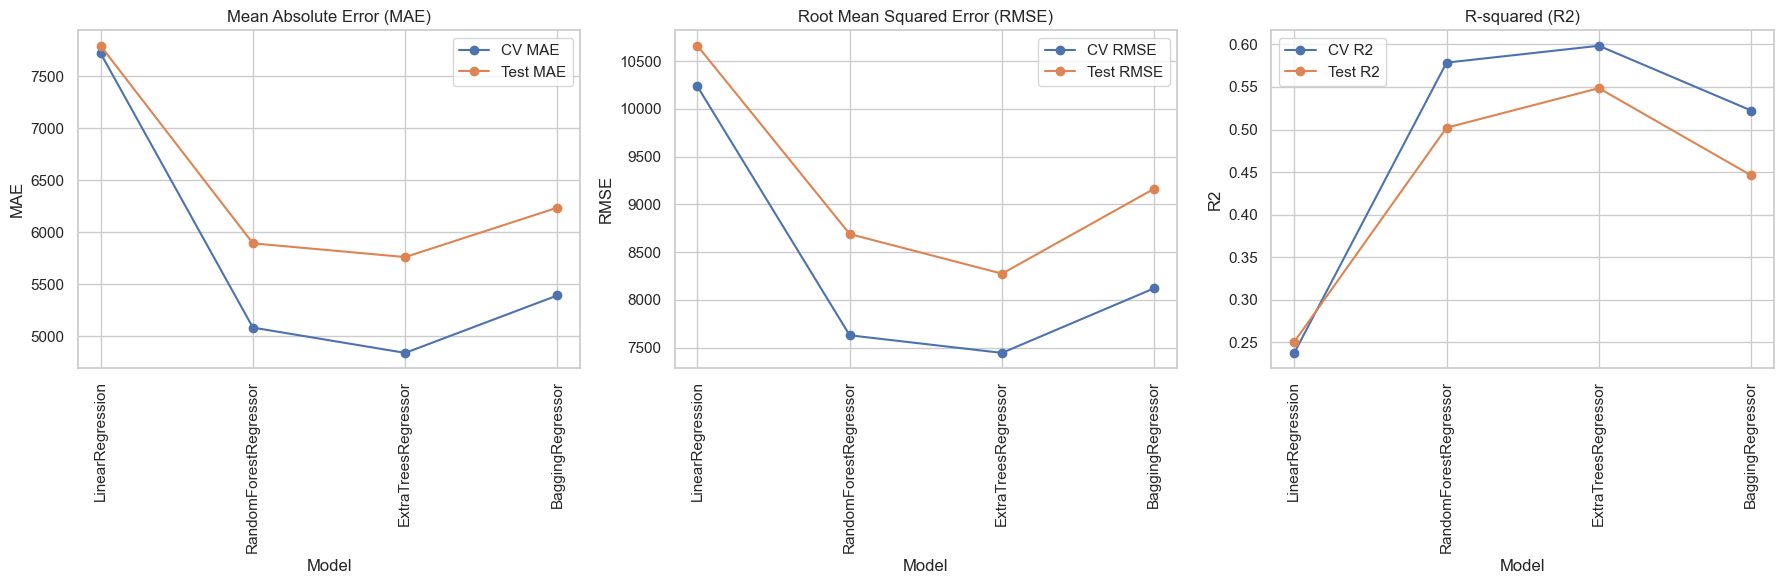

In [67]:
plot_errors(results_df)

<h1 style="text-align:left; color:#3c096c; font-weight:bold; font-size:20px;">Our Final Model</h1>

In [68]:
def plot_regression_performance(y_test, y_pred, color):

    y_test_series = pd.Series(y_test.iloc[:, 0]).reset_index(drop=True)
    y_pred_series = pd.Series(y_pred)
    
    fig, axs = plt.subplots(ncols=3, figsize=(15,5))

    axs[0].scatter(y_test_series, y_pred_series, color=color)
    axs[0].plot([y_test_series.min(), y_test_series.max()], [y_test_series.min(), y_test_series.max()], 'k--', lw=3, color='k')
    axs[0].set_xlabel('Actual Values')
    axs[0].set_ylabel('Predicted Values')
    axs[0].set_title('Scatter Plot with Regression Line')

    errors = y_test_series - y_pred_series
    axs[1].hist(errors, bins=50, color=color)
    axs[1].axvline(x=errors.median(), color='k', linestyle='--', lw=3)
    axs[1].set_xlabel('Errors')
    axs[1].set_ylabel('Frequency')
    axs[1].set_title('Histogram of Errors')

    axs[2].scatter(y_pred_series, errors, color=color)
    axs[2].axhline(y=0, color='k', linestyle='-', lw=3)
    axs[2].set_xlabel('Predicted Values')
    axs[2].set_ylabel('Errors')
    axs[2].set_title('Residual Plot')

    plt.tight_layout()
    plt.show()

In [69]:
model= ExtraTreesRegressor()
model.fit(X_reg_train, y_reg_train)
y_reg_pred = model.predict(X_reg_test)

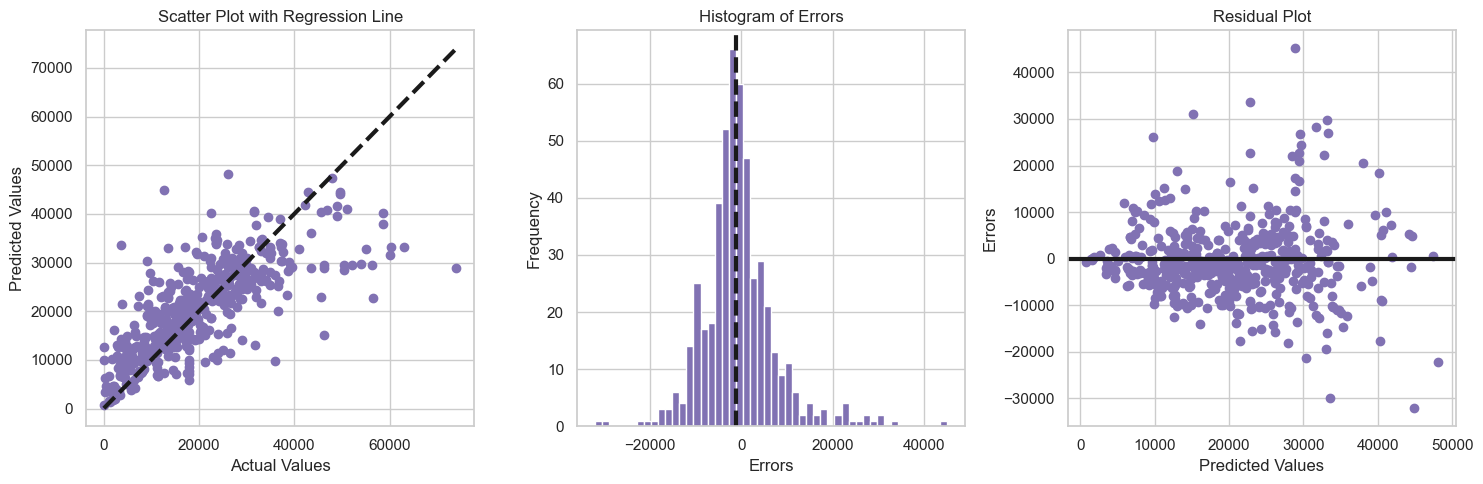

In [70]:
plot_regression_performance(y_reg_test, y_reg_pred, color='m')

<h1 style="text-align:left; color:#3c096c; font-weight:bold; font-size:20px;">Feature Importance</h1>

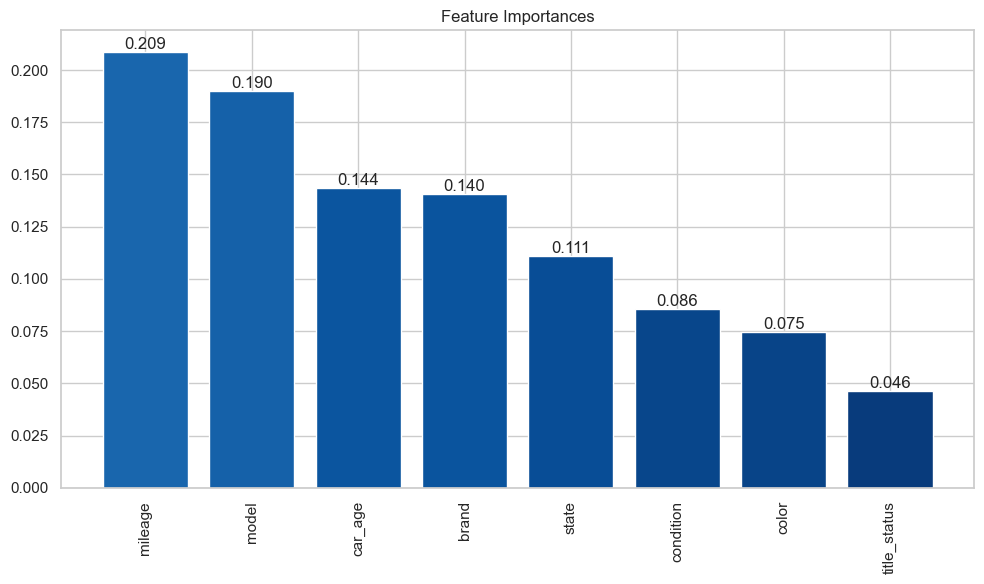

In [71]:
model= ExtraTreesRegressor()
model.fit(X_reg_train, y_reg_train)

importances = model.feature_importances_
feature_names = X_reg_train.columns

indices = np.argsort(importances)[::-1]


plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_reg_train.shape[1]), importances[indices], color=plt.cm.Blues_r(importances[indices]), align="center")
for i, idx in enumerate(indices):
    plt.text(i, importances[idx], f"{importances[idx]:.3f}", ha='center', va='bottom')
    
plt.xticks(range(X_reg_train.shape[1]), [feature_names[idx] for idx in indices], rotation=90)
plt.tight_layout()
plt.show()

<h1 style="text-align:left; color:#3c096c; font-weight:bold; font-size:28px;">Modelling ---> Classification</h1>

<h1 style="text-align:left; color:#3c096c; font-weight:bold; font-size:20px;">Our data</h1>

In [72]:
X_class_train = pd.read_csv('X_class_train.csv')
y_class_train = pd.read_csv('y_class_train.csv')
X_class_test = pd.read_csv('X_class_test.csv')
y_class_test = pd.read_csv('y_class_test.csv')

<h1 style="text-align:left; color:#3c096c; font-weight:bold; font-size:20px;">Model Baseline</h1>

In [73]:
base = DummyClassifier(strategy = "constant", constant = 0)
base.fit(X_class_train, y_class_train)
y_pred_base = base.predict(X_class_test)

print(f"Your baseline model achieves accuracy = {accuracy_score(y_class_test, y_pred_base)}")
print(f"Your baseline model achieves f1 = {f1_score(y_class_test, y_pred_base)}")
print(f"Your baseline model achieves roc_auc = {roc_auc_score(y_class_test, y_pred_base)}")

Your baseline model achieves accuracy = 0.6948051948051948
Your baseline model achieves f1 = 0.0
Your baseline model achieves roc_auc = 0.5


<h1 style="text-align:left; color:#3c096c; font-weight:bold; font-size:20px;">Trying Models</h1>

In [74]:
models = [
    LogisticRegression(solver='liblinear', penalty='l2', max_iter=500, class_weight='balanced', C=0.1),
    SGDClassifier(penalty='l2', max_iter=1000, loss='hinge', class_weight='balanced', alpha=0.1),
    SVC(kernel= 'rbf', gamma='scale', degree=4, class_weight='balanced', C=1),
    DecisionTreeClassifier(min_samples_split=10, min_samples_leaf=2, max_depth=5, criterion='entropy'),
    KNeighborsClassifier(weights='distance', p=1, n_neighbors=20, leaf_size=20, algorithm='kd_tree'),
    RandomForestClassifier(random_state=21, n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_depth=None, criterion='entropy'),
    BaggingClassifier(random_state=0, n_estimators=200, max_samples=1.0, max_features=0.7, bootstrap_features=True)
]

In [75]:
def evaluate_models(models, X_class_train, X_class_test, y_class_train, y_class_test, cv):
    results = []

    for model in models:
        try:
            model.fit(X_class_train, y_class_train.values.ravel())
            
            cv_results = cross_validate(model, X_class_train, y_class_train.values.ravel(), cv=cv,
                                        scoring=['accuracy', 'roc_auc', 'f1'], return_train_score=True)

            train_mean_accuracy = np.mean(cv_results['train_accuracy'])
            train_mean_roc_auc = np.mean(cv_results['train_roc_auc'])
            train_mean_f1 = np.mean(cv_results['train_f1'])

            test_preds = model.predict(X_class_test)
            test_accuracy = accuracy_score(y_class_test, test_preds)
            test_roc_auc = roc_auc_score(y_class_test, test_preds)
            test_f1 = f1_score(y_class_test, test_preds)

            results_dict = {
                'model': model.__class__.__name__,
                'train_accuracy': train_mean_accuracy,
                'test_accuracy': test_accuracy,
                'train_f1': train_mean_f1,
                'test_f1': test_f1,
                'train_roc_auc': train_mean_roc_auc,
                'test_roc_auc': test_roc_auc
            }
            results.append(results_dict)
        except NotFittedError as e:
            print(f"Error: {e}. Skipping {model.__class__.__name__}.")

    results_df = pd.DataFrame(results)
    return results_df

In [76]:
results_df = evaluate_models(models, X_class_train, X_class_test, y_class_train, y_class_test, cv=5)
results_df

,model,train_accuracy,test_accuracy,train_f1,test_f1,train_roc_auc,test_roc_auc
0,LogisticRegression,0.800078,0.844156,0.746780,0.781818,0.875813,0.863989
1,SGDClassifier,0.798450,0.844156,0.743732,0.781818,0.877194,0.863989
2,SVC,0.884362,0.837662,0.848532,0.761905,0.938078,0.841420
3,DecisionTreeClassifier,0.925078,0.870130,0.896426,0.800000,0.980019,0.864784
4,KNeighborsClassifier,1.000000,0.883117,1.000000,0.812500,1.000000,0.868165
5,RandomForestClassifier,0.984936,0.889610,0.978901,0.831683,0.999341,0.890734
6,BaggingClassifier,1.000000,0.928571,1.000000,0.886598,1.000000,0.924737


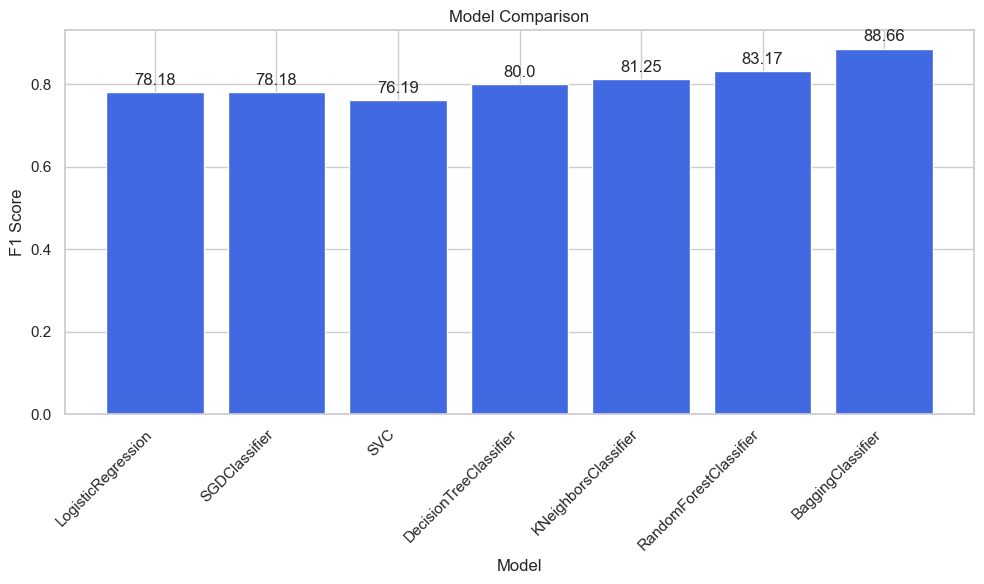

In [77]:
plt.figure(figsize=(10, 6))
bars = plt.bar(results_df['model'], results_df['test_f1'], color='royalblue')  
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.title('Model Comparison')
plt.xticks(rotation=45, ha='right')  

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval*100, 2), ha='center', va='bottom')

plt.tight_layout()  
plt.show()

<h1 style="text-align:left; color:#3c096c; font-weight:bold; font-size:20px;">Best Model</h1>

In [78]:
best_model = BaggingClassifier(random_state=0, n_estimators=200, max_samples=1.0, max_features=0.7, bootstrap_features=True)
best_model.fit(X_class_train, y_class_train)
best_y_pred = best_model.predict(X_class_test)

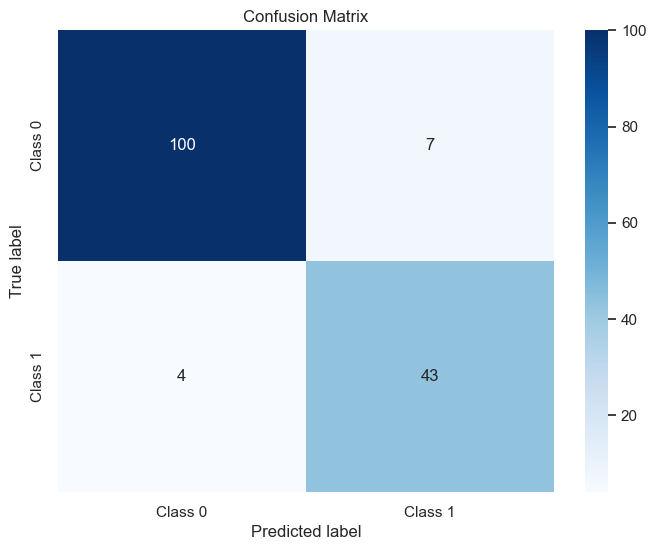

In [79]:
conf_mat = confusion_matrix(y_class_test, best_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()


* ***<span style='color:#3c096c;'>As we learned about sklearn basics and preprocessing, we ran into some trouble during modeling.</span>***

    * ***<span style='color:#7b2cbf;'>In regression, the model's performance was poor. Why did this happen, and how can we improve it?</span>***
    * ***<span style='color:#7b2cbf;'>Also, our classification model suffered from overfitting. What does that mean, and why is it harmful?</span>***

<h1 style="text-align:center; color:#10002b; font-weight:bold; font-size:28px;">We'll tackle these questions and more in our next session on modeling.</h1>

<h1 style="text-align:center; color:#10002b; font-weight:bold; font-size:28px;">Stay tuned for solutions!</h1>